## CMPINF 2100 Week 11 | Working with LINEAR MODELS with ADDITIVE FEATURES

We will GENERATE our own data for this example. This will again review the assumptions of the LINEAR MODEL!

We will fit the model using `statsmodels`. We will interpret the results via the COEFFICIENT summaries. We will interpret results through PREDICTIONS. And we will use specialized `statsmodels` graphics to get further insights into the behavior.

### Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

### Linear Additive Features

We will work with 2 inputs but the ideas scale to MANY inputs.

To create our own data we MUST specify the regression coefficients!

In [2]:
b0 = -0.25
b1 = 1.95
b2 = 0.2

### Make Random Input Data

Randomly generate input values for this problem. Let's assume both inputs have STANDARD NORMAL Distributions.

STANDARD NORMAL are Gaussians with MEAN 0 and STANDARD DEVIATION of 1.

In [3]:
N = 35 ### number of observations

In [4]:
rg = np.random.default_rng(2100)

Call the random number generator for 2 inputs.

In [5]:
input_df = pd.DataFrame({'x1': rg.normal( loc=0, scale=1, size=N),
                         'x2': rg.normal( loc=0, scale=1, size=N)})

In [6]:
input_df.head()

,x1,x2
0,1.024252,-0.650623
1,-1.733671,0.993904
2,-0.089294,0.251805
3,-1.093748,1.356543
4,0.320995,-0.145121


Calculate the TREND or AVERAGE OUTPUT assuming the LINEAR ADDITIVE FEATURES.

In [7]:
df = input_df.copy()

In [8]:
df['trend'] = b0 + b1 * df.x1 + b2 * df.x2

The OUTPUT is NORMALLY distributed around the TREND!

We will call ONE MORE Gaussian random number generator!

We need to set the RESIDUAL ERROR or REMAINING VARIATION AROUND THE TREND!

In [9]:
my_sigma = 0.85

In [10]:
df['y'] = rg.normal( loc=df.trend, scale=my_sigma, size=df.shape[0] )

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      35 non-null     float64
 1   x2      35 non-null     float64
 2   trend   35 non-null     float64
 3   y       35 non-null     float64
dtypes: float64(4)
memory usage: 1.2 KB


### Visualize the Relationships between Inputs and Output

Start with the relationship between `x1` and `y`.

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


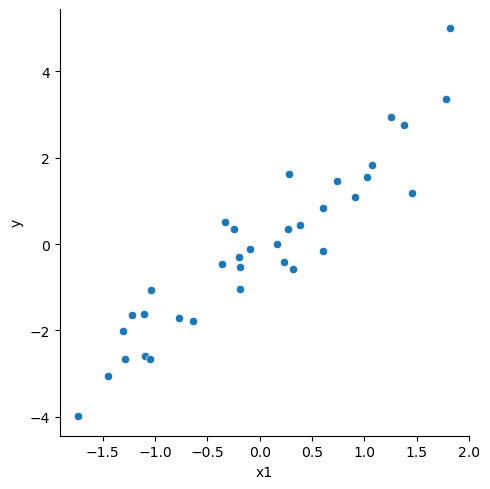

In [12]:
sns.relplot(data=df, x='x1', y='y', kind='scatter')

plt.show()

Let's now examine the relationship between `x2` and `y`.

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


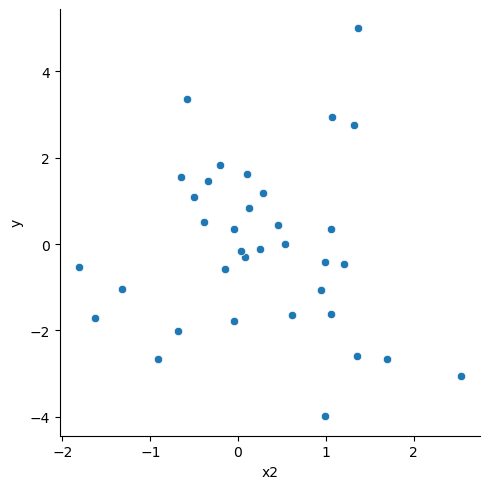

In [13]:
sns.relplot(data=df, x='x2', y='y', kind='scatter')

plt.show()

We can include LINEAR TREND LINES to HELP identify POSSIBLE trends between the OUTPUT and the INPUTS!

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


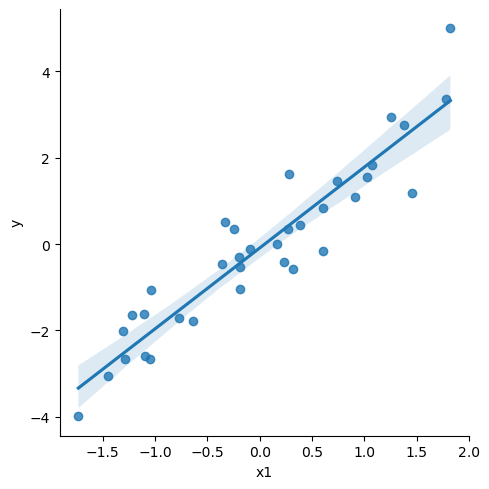

In [14]:
sns.lmplot( data=df, x='x1', y='y')

plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


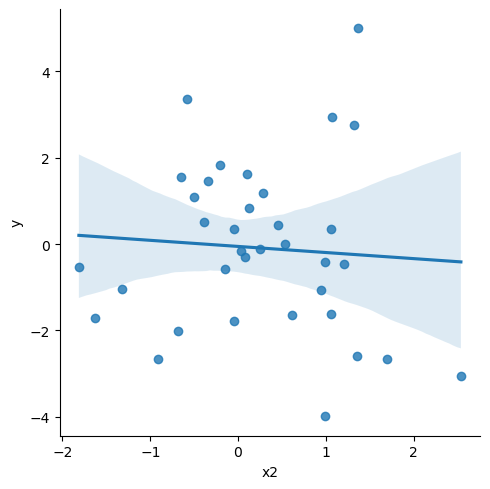

In [15]:
sns.lmplot( data=df, x='x2', y='y')

plt.show()

In [16]:
print(b2)

0.2


### Fit Linear Models to CONFIRM the Visualizations

Fit the linear model with a LINEAR RELATIONSHIP between the TREND and `x1` BY ITSELF.

In [25]:
fit_x1 = smf.ols(formula='y~x1', data=df).fit()

In [26]:
fit_x1.params

Intercept   -0.090893
x1           1.871110
dtype: float64

In [27]:
fit_x1.bse

Intercept    0.120418
x1           0.124351
dtype: float64

In [28]:
fit_x1.pvalues

Intercept    4.557120e-01
x1           2.465001e-16
dtype: float64

In [29]:
fit_x1.pvalues < 0.05

Intercept    False
x1            True
dtype: bool

In [30]:
fit_x1.conf_int().\
rename(columns={0: 'conf_lwr', 1: 'conf_upr'})

,conf_lwr,conf_upr
Intercept,-0.335885,0.154098
x1,1.618115,2.124105


In [24]:
fit_x2 = smf.ols(formula='y~x2', data=df).fit()

In [31]:
fit_x2.params

Intercept   -0.055393
x2          -0.141163
dtype: float64

In [32]:
fit_x2.bse

Intercept    0.348395
x2           0.354524
dtype: float64

In [33]:
fit_x2.pvalues

Intercept    0.874641
x2           0.693066
dtype: float64

In [34]:
fit_x2.pvalues < 0.05

Intercept    False
x2           False
dtype: bool

In [35]:
fit_x2.conf_int().\
rename(columns={0: 'conf_lwr', 1: 'conf_upr'})

,conf_lwr,conf_upr
Intercept,-0.764209,0.653422
x2,-0.862448,0.580123


### Visualize the COEFFICIENT SUMMARIES

In [36]:
def my_coefplot( mod, figsize_use=(10, 4)):
    fig, ax = plt.subplots(figsize=figsize_use)

    ax.errorbar( y=mod.params.index,
                 x=mod.params,
                 xerr = 2 * mod.bse,
                 fmt='o', color='k', ecolor='k', elinewidth=2, ms=10)

    ax.axvline(x=0, linestyle='--', linewidth=3.5, color='grey')

    ax.set_xlabel('coefficient value')

    plt.show()

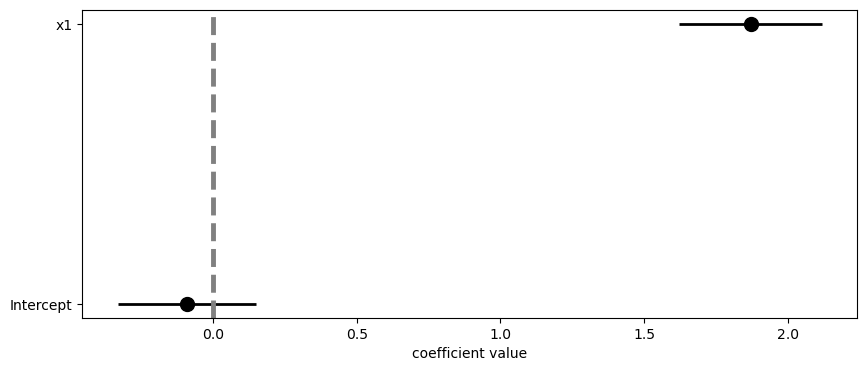

In [37]:
my_coefplot (fit_x1 )

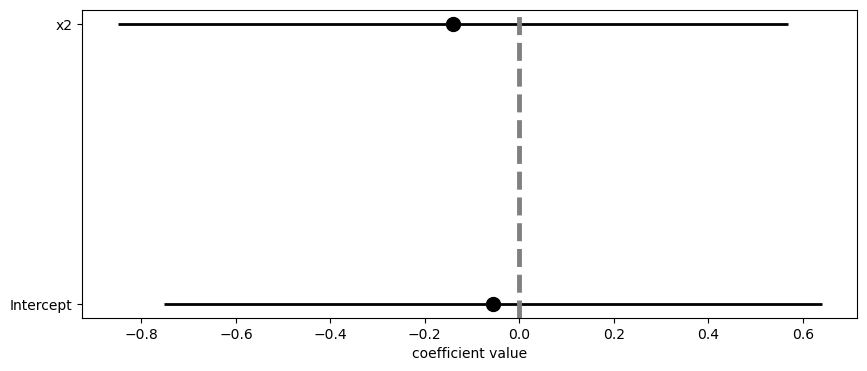

In [38]:
my_coefplot ( fit_x2 )

### Linear Additive Features with BOTH Inputs

In [40]:
fit_x1x2_add = smf.ols(formula='y ~ x1 + x2', data=df).fit()

In [42]:
fit_x1x2_add.params

Intercept   -0.109888
x1           1.879500
x2           0.075586
dtype: float64

In [43]:
fit_x1x2_add.bse

Intercept    0.125869
x1           0.126418
x2           0.128857
dtype: float64

In [44]:
fit_x1x2_add.pvalues

Intercept    3.891495e-01
x1           6.381066e-16
x2           5.615963e-01
dtype: float64

In [45]:
fit_x1x2_add.pvalues < 0.05

Intercept    False
x1            True
x2           False
dtype: bool

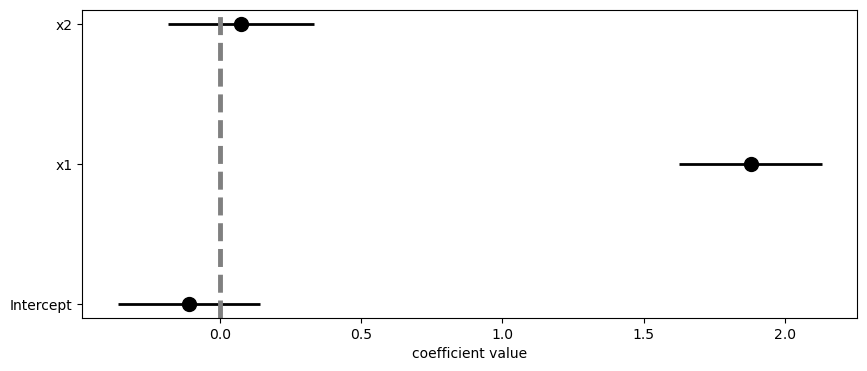

In [46]:
my_coefplot( fit_x1x2_add )

### Predictions

Predictions involving MULTIPLE inputs REQUIRE DataFrames that have ALL inputs used to FIT the MODEL!

I like to VISUALIZE the RELATIONSHIP between the OUTPUT and the MOST IMPORTANT INPUT!

In [47]:
np.abs(fit_x1x2_add.params).sort_values(ascending=False)

x1           1.879500
Intercept    0.109888
x2           0.075586
dtype: float64

Create a DataFrame with MANY values of `x1` for a SINGLE value of `x2`.

In [48]:
df_viz_1 = pd.DataFrame({'x1': np.linspace( df.x1.min()-0.02, df.x1.max()+0.02, num=251 )})

In [49]:
df_viz_1['x2'] = df.x2.mean()

In [50]:
df_viz_1

,x1,x2
0,-1.753671,0.251296
1,-1.739287,0.251296
2,-1.724903,0.251296
3,-1.710519,0.251296
4,-1.696135,0.251296
...,...,...
246,1.784818,0.251296
247,1.799202,0.251296
248,1.813586,0.251296
249,1.827970,0.251296


When we make predictions we WANT to include the TREND (average output), the UNCERTAINTY on the TREND ( the CONFIDENCE ITNERVAL) and the UNCERTAINTY of a SINGLE MEASUREMENT (the PREDICTION INTERVAL).

In [51]:
predictions_1 = fit_x1x2_add.get_prediction( df_viz_1 )

In [52]:
pred_x1x2_add_summary = predictions_1.summary_frame()

In [53]:
pred_x1x2_add_summary

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-3.386918,0.252871,-3.902000,-2.871836,-4.940541,-1.833295
1,-3.359883,0.251279,-3.871721,-2.848045,-4.912434,-1.807333
2,-3.332848,0.249689,-3.841448,-2.824248,-4.884335,-1.781362
3,-3.305814,0.248103,-3.811182,-2.800445,-4.856243,-1.755384
4,-3.278779,0.246519,-3.780922,-2.776635,-4.828160,-1.729397
...,...,...,...,...,...,...
246,3.263671,0.256327,2.741550,3.785793,1.707700,4.819642
247,3.290706,0.257929,2.765321,3.816091,1.733637,4.847775
248,3.317741,0.259534,2.789087,3.846395,1.759566,4.875916
249,3.344776,0.261142,2.812847,3.876705,1.785487,4.904065


Visualize the predictions using ribbons for the UNCERTAINTY INTERVALS and LINES for the TREND!

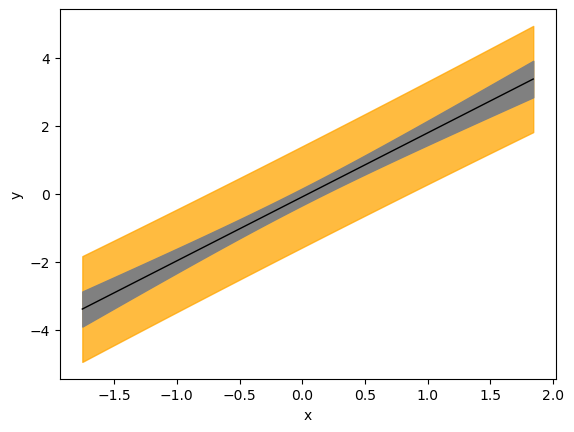

In [54]:
fig, ax = plt.subplots()

# prediction interval
ax.fill_between( df_viz_1.x1,
                 pred_x1x2_add_summary.obs_ci_lower, pred_x1x2_add_summary.obs_ci_upper,
                 facecolor='orange', alpha=0.75, edgecolor='orange')
# confidence interval
ax.fill_between( df_viz_1.x1,
                 pred_x1x2_add_summary.mean_ci_lower, pred_x1x2_add_summary.mean_ci_upper,
                 facecolor='grey', edgecolor='grey')
# trend
ax.plot(df_viz_1.x1, pred_x1x2_add_summary['mean'], color='k', linewidth=1)
# set the labels
ax.set_xlabel('x')
ax.set_ylabel('y')
# show the plot
plt.show()

Now if we want to EXAMINE the INFLUENCE of the OTHER INPUTS... then we need to allow the `x2` INPUT to ALSO CHANGE!

The VISUALIZATION DataFrame must therefore consider MULTIPLE **COMBINATIONS** of teh continuous inputs!

We need to create a GRID of INPUT COMBINATIONS. Let's use LIST COMPREHENSIONS to manage for us!

In [55]:
input_grid = pd.DataFrame([ (x1, x2) for x1 in np.linspace( df.x1.min(), df.x1.max(), num=101 )
                                     for x2 in np.linspace( df.x2.min(), df.x2.max(), num=9)],
                           columns=['x1', 'x2'])

In [56]:
input_grid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      909 non-null    float64
 1   x2      909 non-null    float64
dtypes: float64(2)
memory usage: 14.3 KB


In [57]:
input_grid.nunique()

x1    101
x2      9
dtype: int64

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


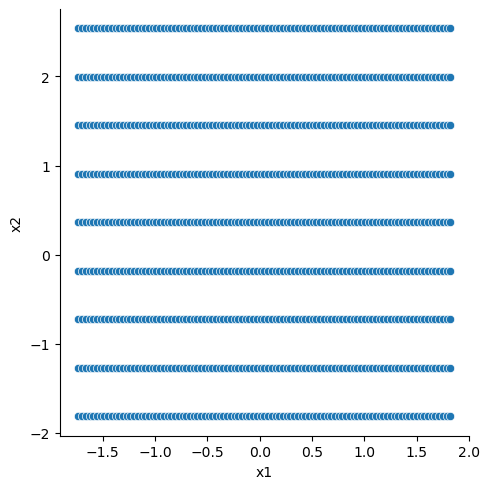

In [59]:
sns.relplot( data=input_grid, x='x1', y='x2', kind='scatter')

plt.show()

Let's PREDICT using the `input_grid` BUT... ONLY RETURN the PREDICTED TREND! WE will NOT return the UNCERTAINTY!

use the `.predict()` method to RETURN  the PREDICTED TREND!

In [60]:
viz_grid = input_grid.copy()

In [61]:
viz_grid['pred'] = fit_x1x2_add.predict( input_grid )

In [62]:
viz_grid

,x1,x2,pred
0,-1.733671,-1.813330,-3.505384
1,-1.733671,-1.269344,-3.464267
2,-1.733671,-0.725357,-3.423149
3,-1.733671,-0.181371,-3.382032
4,-1.733671,0.362615,-3.340914
...,...,...,...
904,1.822354,0.362615,3.342635
905,1.822354,0.906601,3.383753
906,1.822354,1.450587,3.424870
907,1.822354,1.994573,3.465988


Let's COLOR the PREDICTED TREND by each unique value of `x2` to show the RELATIONSHIP of the TREND with repsect to `x1` for each unique value of `x2`!

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


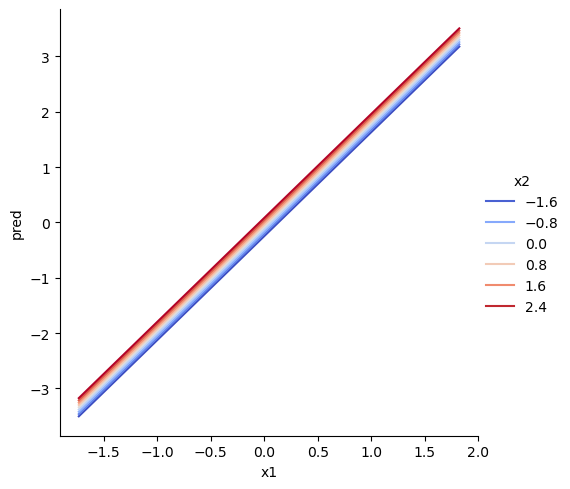

In [65]:
sns.relplot(data=viz_grid, x='x1', y='pred', kind='line',
            hue='x2', palette='coolwarm',
            estimator=None, units='x2')

plt.show()

In [66]:
fit_x1x2_add.params

Intercept   -0.109888
x1           1.879500
x2           0.075586
dtype: float64

### Statsmodels Specialized Graphics

`statsmodels` has specialized graphics to help you wizualization of your linear models.

BUT... there are FEW THINGS you MUST remember when you use these functions!

In [67]:
import statsmodels.api as sm

Creating these specialized figures requires initializing the FIGURE and AXIS objects via `matplotlib`.

<function matplotlib.pyplot.show(close=None, block=None)>

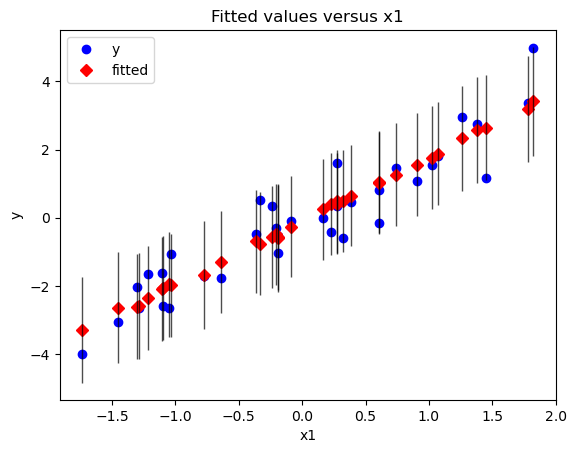

In [68]:
fig, ax = plt.subplots()

sm.graphics.plot_fit(fit_x1x2_add, 'x1', ax=ax)

plt.show

Let's visualize the TRAINING SET FIT with repsect to `x2`.

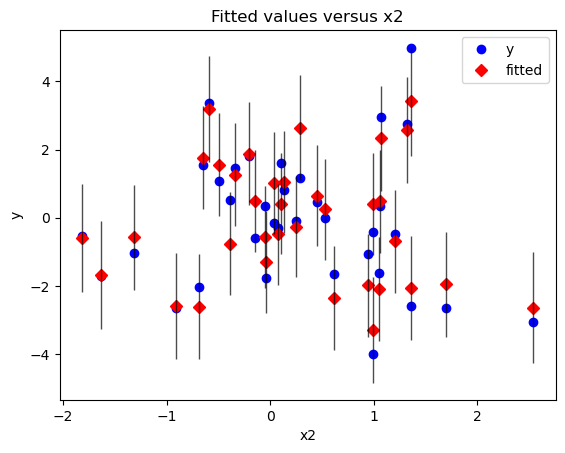

In [69]:
fig, ax = plt.subplots()

sm.graphics.plot_fit( fit_x1x2_add, 'x2', ax=ax)

plt.show()

We can examine the TRAINING set PREDICTIONS or FITS AND the RESIDUALS and the **PARTIAL regression plot** in one figure.

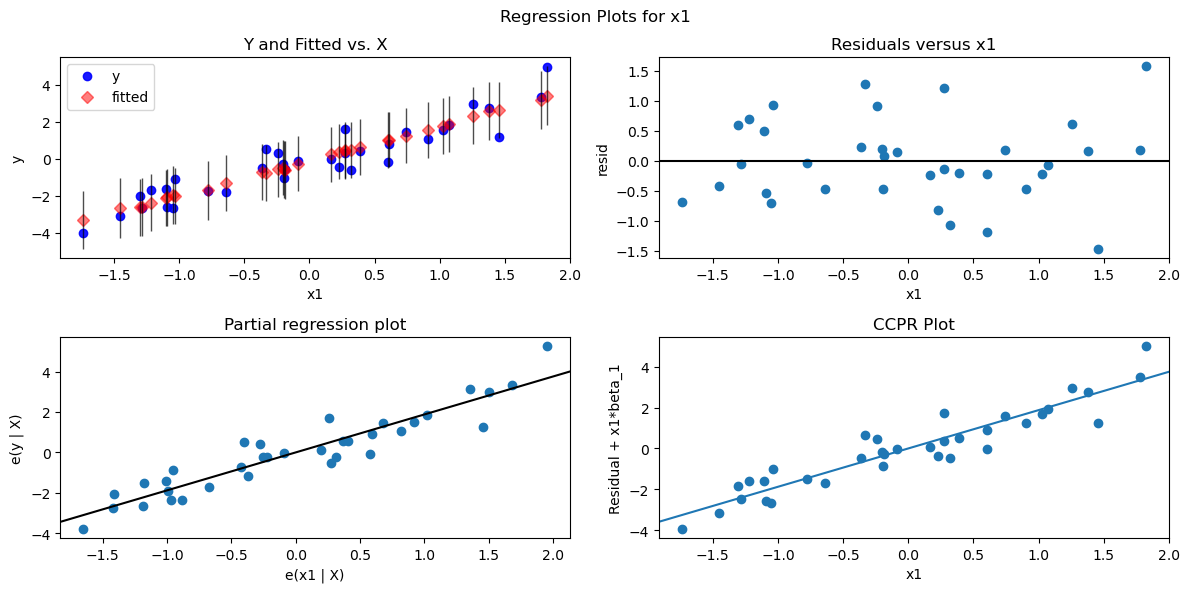

In [72]:
fig = plt.figure(figsize=(12,6))

sm.graphics.plot_regress_exog(fit_x1x2_add,'x1', fig=fig)

plt.show()

In [73]:
fit_x1x2_add.params

Intercept   -0.109888
x1           1.879500
x2           0.075586
dtype: float64

In [74]:
b2

0.2

In [75]:
fit_x2.params

Intercept   -0.055393
x2          -0.141163
dtype: float64

### Save our Randomly Generated 

In [76]:
df.to_csv('linear_additive_example.csv', index=False)